In [2]:
import pandas as pd
import numpy as np

### Create Pandas Series out of different collection types

In [14]:
mylist = list('abcedfghijklmnopqrstuvwxyz')
ndarr = np.arange(26)
mydict = dict(zip(mylist, ndarr))

# Solution
ser1 = pd.Series(mylist)
ser2 = pd.Series(ndarr)
ser3 = pd.Series(mydict)

print(ser3.head())

a    0
b    1
c    2
e    3
d    4
dtype: int64


### Convert the series ser into a dataframe with its index as another column on the dataframe.

In [19]:
mylist = list("abcedfghijklmnopqrstuvwxyz")
myarr = np.arange(26)
mydict = dict(zip(mylist, myarr))
ser = pd.Series(mydict)

# Solution
df = ser.to_frame().reset_index().rename(columns={0:'value'})
print(df.head())

  index  value
0     a      0
1     b      1
2     c      2
3     e      3
4     d      4


### Combine ser1 and ser2 to form a dataframe.

In [45]:
import numpy as np
ser1 = pd.Series(list('abcedfghijklmnopqrstuvwxyz'))
ser2 = pd.Series(np.arange(26))

# Solution 1
df = pd.concat([ser1, ser2], axis=1)

# Solution 2
df = pd.DataFrame({'col1': ser1, 'col2': ser2})

df

,col1,col2
0,a,0
1,b,1
2,c,2
3,e,3
4,d,4
5,f,5
6,g,6
7,h,7
8,i,8
9,j,9


Setting axis to 1 results in dataframe with 2 columns and setting axis to 0 results in a series containing both previous series concatenated into 1 series with the length equal to the sum of lengths of 2 initial series

In [41]:
import pandas as pd

ser1 = pd.Series([1, 2, 3], name='Series 1')
ser2 = pd.Series([4, 5, 6], name='Series 2')

result = pd.concat([ser1, ser2], axis=0).reset_index(drop=True)
result

0    1
1    2
2    3
3    4
4    5
5    6
dtype: int64

### Give a name to the series ser calling it ‘alphabets’.

In [3]:
ser = pd.Series(list('abcedfghijklmnopqrstuvwxyz'))

# Solution
ser.name = 'alphabets'
ser

0     a
1     b
2     c
3     e
4     d
5     f
6     g
7     h
8     i
9     j
10    k
11    l
12    m
13    n
14    o
15    p
16    q
17    r
18    s
19    t
20    u
21    v
22    w
23    x
24    y
25    z
Name: alphabets, dtype: object

### From ser1 remove items present in ser2

In [53]:
ser1 = pd.Series([1, 2, 3, 4, 5])
ser2 = pd.Series([4, 5, 6, 7, 8])

# Solution 1 (better)
ser1[~ser1.isin(ser2)]

# Solution 2
result = []
for item in ser1:
    if item not in ser2.values:
        result.append(item) 

result = pd.Series(result)  
result

0    1
1    2
2    3
dtype: int64

### Get all items of ser1 and ser2 not common to both.

In [66]:
ser1 = pd.Series([1, 2, 3, 4, 5])
ser2 = pd.Series([4, 5, 6, 7, 8])

# Solution 1
pd.concat([ser1[~ser1.isin(ser2)], ser2[~ser2.isin(ser1)]], axis=0)

# Solution 2 (using numpy set operations)
ser_u = pd.Series(np.union1d(ser1, ser2))  # union
ser_i = pd.Series(np.intersect1d(ser1, ser2))  # intersect
ser_u[~ser_u.isin(ser_i)]

0    1
1    2
2    3
5    6
6    7
7    8
dtype: int64

### Compute the minimum, 25th percentile, median, 75th, and maximum of ser.

In [84]:
ser = pd.Series(np.random.normal(10, 5, 25))

# Solution 1
[ser.min(), ser.quantile(q=0.25), ser.median(), ser.quantile(q=0.75), ser.max()]

# Solution 2
np.quantile(ser, q=[0, 0.25, 0.5, 0.75, 1])

array([ 3.37153677,  6.8679272 ,  9.22669728, 12.41286643, 24.48056457])

### Calculte the frequency counts of each unique value ser.

In [95]:
ser = pd.Series(np.take(list('abcdefgh'), np.random.randint(8, size=30)))

# Solution 1
counts1 = ser.value_counts()

# Solution 2
counts2 = {}
for item in ser:
    counts2[item] = counts2.get(item, 0) + 1
counts2

g    5
b    4
h    4
e    4
f    4
d    4
a    3
c    2
Name: count, dtype: int64
{'b': 4, 'g': 5, 'h': 4, 'c': 2, 'e': 4, 'a': 3, 'f': 4, 'd': 4}


### From ser, keep the top 2 most frequent items as it is and replace everything else as ‘Other’.

In [119]:
np.random.RandomState(100)
ser = pd.Series(np.random.randint(1, 5, [12]))
#print(ser)

# Solution 1
max2 = ser.value_counts().head(2)
#print(max2)
ser.map(lambda x: 'other' if x not in max2.index else x)

# Solution 2
print("Top 2 Freq:\n", ser.value_counts())
ser[~ser.isin(ser.value_counts().index[:2])] = 'Other'
ser

0         4
1         4
2         4
3     other
4     other
5         4
6         3
7     other
8         3
9         3
10    other
11        4
dtype: object

### Bin the series ser into 10 equal deciles and replace the values with the bin name.

In [7]:
ser = pd.Series(np.random.random(20))

# Solution
deciles = pd.qcut(ser, q=[0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1], 
        labels=['1st', '2nd', '3rd', '4th', '5th', '6th', '7th', '8th', '9th', '10th'])

<BarContainer object of 10 artists>

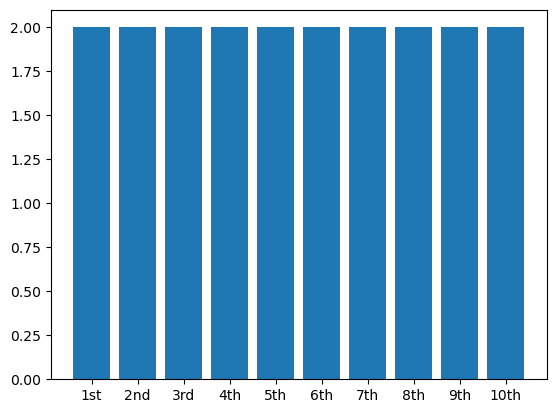

In [13]:
import matplotlib.pyplot as plt

counts = deciles.value_counts()

plt.bar(counts.index, counts)

### Reshape the series ser into a dataframe with 7 rows and 5 columns

In [16]:
ser = pd.Series(np.random.randint(1, 10, 35))

# Solution
df = pd.DataFrame(ser.values.reshape(7,5))
print(df)

   0  1  2  3  4
0  1  9  5  7  9
1  8  9  3  3  7
2  4  3  1  8  6
3  8  1  4  3  9
4  9  1  5  9  9
5  6  5  1  6  6
6  9  2  3  5  5


array([[1, 9, 5, 7, 9],
       [8, 9, 3, 3, 7],
       [4, 3, 1, 8, 6],
       [8, 1, 4, 3, 9],
       [9, 1, 5, 9, 9],
       [6, 5, 1, 6, 6],
       [9, 2, 3, 5, 5]])

### Find the positions of numbers that are multiples of 3 from ser.

In [30]:
ser = pd.Series(np.random.randint(1, 10, 7))

# Solution
print(ser)
divisible_by_3 = ser[ser % 3 == 0].index
print(divisible_by_3)

0    8
1    2
2    9
3    8
4    1
5    8
6    1
dtype: int64
Index([2], dtype='int64')


### From ser, extract the items at positions in list pos.

In [ ]:
ser = pd.Series(list('abcdefghijklmnopqrstuvwxyz'))
pos = [0, 4, 8, 14, 20]

# Solution
